In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing






In [3]:
#read csv using pandas frame and add the names of the columns you want to use from that csv
pdframe=pd.read_csv("twoYears.csv",usecols=["Nitrogen Oxide","Ozone","PM2.5","PM10"])

In [4]:
pdframe.head()


,Nitrogen Oxide,Ozone,PM2.5,PM10
0,13.38702,56.92734,4.917,5.851
1,16.06452,57.57595,4.476,4.917
2,17.77621,64.11186,2.941,4.476
3,17.38128,67.20520,2.116,2.941
4,17.24932,68.30283,1.509,2.116


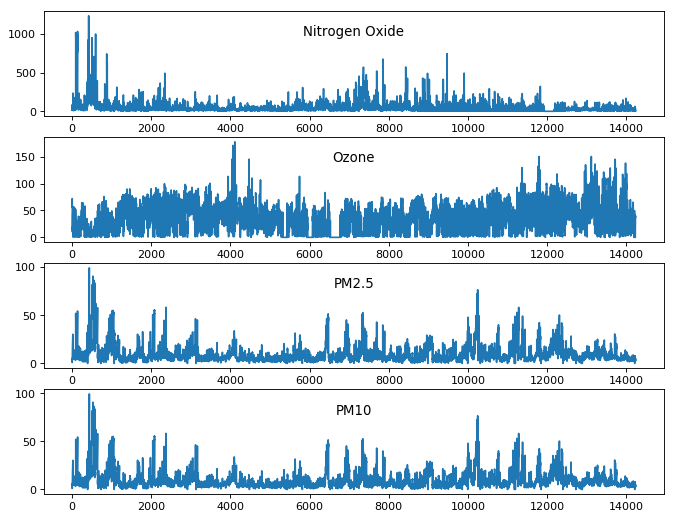

In [7]:
plot_cols=["Nitrogen Oxide","Ozone","PM2.5","PM10"]
i = 1
# Set the figure size 
plt.figure(figsize = (10,8),dpi=80)

for col in plot_cols:
#     print(i)
#     print(col) #col names 
    plt.subplot(len(plot_cols), 1, i) #creating separate subplots
    plt.plot(pdframe[col]) #all values of all columns for plotting
    plt.title(col,y=.7,loc='center') #set the name of col and it's position in each subplot like center in this plot.
    i += 1
plt.show()

In [31]:
pdframe.fillna(0, inplace = True)
# pdframe = pdframe.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(pdframe)
# pdframe = pd.DataFrame(x_scaled)
number_of_days=2 #here we can change the number of days required to forecast

df_train = pdframe.iloc[:(-24*number_of_days), :].copy()
df_test = pdframe.iloc[-24*number_of_days:, :].copy()
print("length of data point :{}".format(len(pdframe)))



length of data point :14232


In [10]:
print("length of train data points: {}".format(len(df_train)))
df_train.head()



length of train data points: 14136
length of test data points: 96


,Nitrogen Oxide,Ozone,PM2.5,PM10
14136,29.73938,20.85507,3.465,4.775
14137,34.09031,19.30840,3.198,3.465
14138,21.46781,30.98324,3.046,3.198
14139,20.32031,42.35873,3.235,3.046
14140,29.97844,37.96819,2.974,3.235


In [11]:
print("length of test data points: {}".format(len(df_test)))
df_test.head()

length of test data points: 96


,Nitrogen Oxide,Ozone,PM2.5,PM10
14136,29.73938,20.85507,3.465,4.775
14137,34.09031,19.30840,3.198,3.465
14138,21.46781,30.98324,3.046,3.198
14139,20.32031,42.35873,3.235,3.046
14140,29.97844,37.96819,2.974,3.235


In [12]:
X_train = df_train.loc[:, ["Nitrogen Oxide","Ozone","PM2.5","PM10"]].values #training input
X_test = df_test.loc[:, ["Nitrogen Oxide","Ozone","PM2.5","PM10"]].values   #testing input


In [13]:
y_train = df_train['PM2.5'].values  #training output
y_test = df_test['PM2.5'].values   #testing output

In [15]:
X_test[-20:]


array([[8.654060e+00, 3.821766e+01, 2.774000e+00, 3.721000e+00],
       [3.490310e+00, 4.235873e+01, 2.127000e+00, 2.774000e+00],
       [2.715750e+01, 3.073378e+01, 6.513000e+00, 2.127000e+00],
       [2.859188e+01, 3.043443e+01, 7.480000e+00, 6.513000e+00],
       [3.542906e+01, 2.868819e+01, 7.876000e+00, 7.480000e+00],
       [6.234750e+01, 1.980732e+01, 6.922000e+00, 7.876000e+00],
       [6.368625e+01, 1.676388e+01, 6.149000e+00, 6.922000e+00],
       [2.605781e+01, 2.569464e+01, 5.812000e+00, 6.149000e+00],
       [1.867875e+01, 2.444733e+01, 3.282000e+00, 5.812000e+00],
       [0.000000e+00, 0.000000e+00, 3.013000e+00, 3.282000e+00],
       [4.408313e+01, 1.382022e+01, 2.804000e+00, 3.013000e+00],
       [2.825719e+01, 1.731270e+01, 3.603000e+00, 2.804000e+00],
       [2.438438e+01, 2.030625e+01, 4.346000e+00, 3.603000e+00],
       [1.180969e+01, 2.624346e+01, 4.120000e+00, 4.346000e+00],
       [6.885000e+00, 3.128260e+01, 2.850000e+00, 4.120000e+00],
       [2.295000e+00, 3.6

In [17]:
y_test[-20:]

array([2.774, 2.127, 6.513, 7.48 , 7.876, 6.922, 6.149, 5.812, 3.282,
       3.013, 2.804, 3.603, 4.346, 4.12 , 2.85 , 2.808, 2.435, 3.104,
       4.805, 0.   ])

In [18]:
y_train = df_train['PM2.5'].values.reshape(-1,1)
y_test = df_test['PM2.5'].values.reshape(-1,1)

In [19]:
y_test[-20:]

array([[2.774],
       [2.127],
       [6.513],
       [7.48 ],
       [7.876],
       [6.922],
       [6.149],
       [5.812],
       [3.282],
       [3.013],
       [2.804],
       [3.603],
       [4.346],
       [4.12 ],
       [2.85 ],
       [2.808],
       [2.435],
       [3.104],
       [4.805],
       [0.   ]])

In [20]:
input_seq_len = 3
output_seq_len = 2

In [21]:
def generate_train_samples(x = X_train, y = y_train, batch_size = 10, input_seq_len = input_seq_len, output_seq_len = output_seq_len):
    total_start_points = len(x) - input_seq_len - output_seq_len
    start_x_idx=np.linspace(0, batch_size-1, 10)
    start_x_idx=start_x_idx.astype(int)
    input_batch_idxs = [list(range(i, i+input_seq_len)) for i in start_x_idx]
    input_seq = np.take(x, input_batch_idxs, axis = 0)
    output_batch_idxs = [list(range(i+input_seq_len, i+input_seq_len+output_seq_len)) for i in start_x_idx]
    output_seq = np.take(y, output_batch_idxs, axis = 0)
    return input_seq, output_seq
print(X_train[:10]) #first 10 values of x_train 
print(y_train[:10]) #first 10 values of y_train
x, y = generate_train_samples()
print(x, y)

[[13.38702 56.92734  4.917    5.851  ]
 [16.06452 57.57595  4.476    4.917  ]
 [17.77621 64.11186  2.941    4.476  ]
 [17.38128 67.2052   2.116    2.941  ]
 [17.24932 68.30283  1.509    2.116  ]
 [16.59094 69.94929  1.038    1.509  ]
 [17.07384 70.34843  1.059    1.038  ]
 [18.25912 72.19445  0.943    1.059  ]
 [14.79128 65.15961  2.123    0.943  ]
 [86.46699 14.01979  6.679    2.123  ]]
[[4.917]
 [4.476]
 [2.941]
 [2.116]
 [1.509]
 [1.038]
 [1.059]
 [0.943]
 [2.123]
 [6.679]]
[[[13.38702 56.92734  4.917    5.851  ]
  [16.06452 57.57595  4.476    4.917  ]
  [17.77621 64.11186  2.941    4.476  ]]

 [[16.06452 57.57595  4.476    4.917  ]
  [17.77621 64.11186  2.941    4.476  ]
  [17.38128 67.2052   2.116    2.941  ]]

 [[17.77621 64.11186  2.941    4.476  ]
  [17.38128 67.2052   2.116    2.941  ]
  [17.24932 68.30283  1.509    2.116  ]]

 [[17.38128 67.2052   2.116    2.941  ]
  [17.24932 68.30283  1.509    2.116  ]
  [16.59094 69.94929  1.038    1.509  ]]

 [[17.24932 68.30283  1.509   

In [22]:
def generate_test_samples(x = X_test, y = y_test, input_seq_len = input_seq_len, output_seq_len = output_seq_len):
    
    total_samples = x.shape[0]
    input_batch_idxs = [list(range(i, i+input_seq_len)) for i in range((total_samples-input_seq_len-output_seq_len))]
    input_seq = np.take(x, input_batch_idxs, axis = 0)
    
    output_batch_idxs = [list(range(i+input_seq_len, i+input_seq_len+output_seq_len)) for i in range((total_samples-input_seq_len-output_seq_len))]
    output_seq = np.take(y, output_batch_idxs, axis = 0)
    
    return input_seq, output_seq
#print("Previous values x:\n"+str(X_test[:10])) #first 10 values of x_test 
#print("Previous values y:\n"+str(y_test[:10])) #first 10 values of y_test
test_x, test_y = generate_test_samples()
print("after converting into univariate input:\n"+str(test_x[:5]))
print("after converting into univariate output:\n"+str(test_y[:5]))

after converting into univariate input:
[[[29.73938 20.85507  3.465    4.775  ]
  [34.09031 19.3084   3.198    3.465  ]
  [21.46781 30.98324  3.046    3.198  ]]

 [[34.09031 19.3084   3.198    3.465  ]
  [21.46781 30.98324  3.046    3.198  ]
  [20.32031 42.35873  3.235    3.046  ]]

 [[21.46781 30.98324  3.046    3.198  ]
  [20.32031 42.35873  3.235    3.046  ]
  [29.97844 37.96819  2.974    3.235  ]]

 [[20.32031 42.35873  3.235    3.046  ]
  [29.97844 37.96819  2.974    3.235  ]
  [22.13719 48.39573  2.881    2.974  ]]

 [[29.97844 37.96819  2.974    3.235  ]
  [22.13719 48.39573  2.881    2.974  ]
  [18.21656 48.69508  2.415    2.881  ]]]
after converting into univariate output:
[[[3.235]
  [2.974]]

 [[2.974]
  [2.881]]

 [[2.881]
  [2.415]]

 [[2.415]
  [2.783]]

 [[2.783]
  [3.095]]]


In [23]:
import copy
import os
import tensorflow as tf
from tensorflow.contrib import rnn
from tensorflow.python.ops import variable_scope
from tensorflow.python.framework import dtypes


C:\Users\st00900\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [24]:
## Parameters
learning_rate = 0.001
lambda_l2_reg = 0.003  

In [25]:
## Network Parameters

# length of input signals
input_seq_len = input_seq_len

# length of output signals
output_seq_len = output_seq_len

# size of LSTM Cell
hidden_dim = 64 

# num of input signals
input_dim = X_train.shape[1]

# num of output signals
output_dim = y_train.shape[1]

# num of stacked lstm layers 
num_stacked_layers = 2 

GRADIENT_CLIPPING = 2.5 # values of gradient clipping to avoid the large update in weights during training

In [26]:
def build_graph(feed_previous = False):
    tf.reset_default_graph()
    
    global_step = tf.Variable(
                  initial_value=0,
                  name="global_step",
                  trainable=False,
                  collections=[tf.GraphKeys.GLOBAL_STEP, tf.GraphKeys.GLOBAL_VARIABLES])
    
    weights = {
        'out': tf.get_variable('Weights_out', \
                               shape = [hidden_dim, output_dim], \
                               dtype = tf.float32, \
                               initializer = tf.truncated_normal_initializer()),
    }
    biases = {
        'out': tf.get_variable('Biases_out', \
                               shape = [output_dim], \
                               dtype = tf.float32, \
                               initializer = tf.constant_initializer(0.)),
    }
                                          
    with tf.variable_scope('Seq2seq'):
        # Encoder: inputs
        enc_inp = [
            tf.placeholder(tf.float32, shape=(None, input_dim), name="inp_{}".format(t))
               for t in range(input_seq_len)
        ]

        # Decoder: target outputs
        target_seq = [
            tf.placeholder(tf.float32, shape=(None, output_dim), name="y".format(t))
              for t in range(output_seq_len)
        ]

        dec_inp = [ tf.zeros_like(target_seq[0], dtype=tf.float32, name="GO") ] + target_seq[:-1]

        with tf.variable_scope('LSTMCell'): 
            cells = []
            for i in range(num_stacked_layers):
                with tf.variable_scope('RNN_{}'.format(i)):
                    cells.append(tf.contrib.rnn.LSTMCell(hidden_dim))
            cell = tf.contrib.rnn.MultiRNNCell(cells)
         
        def _rnn_decoder(decoder_inputs,
                        initial_state,
                        cell,
                        loop_function=None,
                        scope=None):
          with variable_scope.variable_scope(scope or "rnn_decoder"):
            state = initial_state
            outputs = []
            prev = None
            for i, inp in enumerate(decoder_inputs):
              if loop_function is not None and prev is not None:
                with variable_scope.variable_scope("loop_function", reuse=True):
                  inp = loop_function(prev, i)
              if i > 0:
                variable_scope.get_variable_scope().reuse_variables()
              output, state = cell(inp, state)
              outputs.append(output)
              if loop_function is not None:
                prev = output
          return outputs, state

        def _basic_rnn_seq2seq(encoder_inputs,
                              decoder_inputs,
                              cell,
                              feed_previous,
                              dtype=dtypes.float32,
                              scope=None):
          with variable_scope.variable_scope(scope or "basic_rnn_seq2seq"):
            enc_cell = copy.deepcopy(cell)
            _, enc_state = rnn.static_rnn(enc_cell, encoder_inputs, dtype=dtype)
            if feed_previous:
                return _rnn_decoder(decoder_inputs, enc_state, cell, _loop_function)
            else:
                return _rnn_decoder(decoder_inputs, enc_state, cell)

        def _loop_function(prev, _):
          return tf.matmul(prev, weights['out']) + biases['out']
        
        dec_outputs, dec_memory = _basic_rnn_seq2seq(
            enc_inp, 
            dec_inp, 
            cell, 
            feed_previous = feed_previous
        )

        reshaped_outputs = [tf.matmul(i, weights['out']) + biases['out'] for i in dec_outputs]
        
    # Training loss and optimizer
    with tf.variable_scope('Loss'):
        # L2 loss
        output_loss = 0
        for _y, _Y in zip(reshaped_outputs, target_seq):
            output_loss += tf.reduce_mean(tf.pow(_y - _Y, 2))

        # L2 regularization for weights and biases
        reg_loss = 0
        for tf_var in tf.trainable_variables():
            if 'Biases_' in tf_var.name or 'Weights_' in tf_var.name:
                reg_loss += tf.reduce_mean(tf.nn.l2_loss(tf_var))

        loss = output_loss + lambda_l2_reg * reg_loss

    with tf.variable_scope('Optimizer'):
        optimizer = tf.contrib.layers.optimize_loss(
                loss=loss,
                learning_rate=learning_rate,
                global_step=global_step,
                optimizer='Adam',
                clip_gradients=GRADIENT_CLIPPING)
        
    saver = tf.train.Saver
    
    return dict(
        enc_inp = enc_inp, 
        target_seq = target_seq, 
        train_op = optimizer, 
        loss=loss,
        saver = saver, 
        reshaped_outputs = reshaped_outputs,
        )

In [27]:
total_iteractions = 1000 #change epochs may change or improve the results 
batch_size = 16


train_losses = []
val_losses = []

x = np.linspace(0, 40, 130)
train_data_x = x[:110]

rnn_model = build_graph(feed_previous=False)

saver = tf.train.Saver()

init = tf.global_variables_initializer()
with tf.Session() as sess:

    sess.run(init)
    
    print("Training losses: ")
    for i in range(total_iteractions):
        batch_input, batch_output = generate_train_samples(batch_size=batch_size)
        
        feed_dict = {rnn_model['enc_inp'][t]: batch_input[:,t] for t in range(input_seq_len)}
        feed_dict.update({rnn_model['target_seq'][t]: batch_output[:,t] for t in range(output_seq_len)})
        #print(feed_dict)
        _, loss_t = sess.run([rnn_model['train_op'], rnn_model['loss']], feed_dict)
        print(loss_t)
        
    temp_saver = rnn_model['saver']()
    save_path = temp_saver.save(sess, os.path.join('./', 'multivariate_ts_pollution_case'))
        
print("Checkpoint saved at: ", save_path)

Training losses: 
372.03036
341.03534
311.9896
284.4835
258.2298
233.00307
208.65675
185.10355
162.29349
140.22678
119.00655
98.86396
80.14356
63.27753
48.764984
37.153156
29.000463
24.767931
24.333065
25.791145
27.263107
27.73903
26.912262
24.923182
22.16022
19.120804
16.310646
14.149585
12.844681
12.260322
11.964294
11.480111
10.549444
9.206865
7.70586
6.4174805
5.6476555
5.3603034
5.285045
5.1944976
5.002344
4.7633185
4.629442
4.707369
4.8792653
4.9407873
4.7850327
4.4284706
3.9757278
3.5595396
3.2989166
3.2587066
3.242383
3.1785717
3.083219
3.0283272
3.0469303
3.063666
2.9804704
2.847513
2.7659748
2.7484896
2.7008727
2.6619163
2.6206133
2.6648157
2.703399
2.6585844
2.6522121
2.5777411
2.528915
2.5412211
2.474046
2.4643514
2.436178
2.339274
2.4141817
2.4928174
2.4091873
2.3366528
2.3548164
2.2974856
2.2008183
2.2663348
2.3482132
2.3005545
2.2475412
2.2103941
2.1139646
2.0215197
2.032413
2.0266163
2.0329957
2.0139556
1.9202981
1.9309386
1.947371
1.8699706
1.9226793
2.0145586
1.928517

0.097965874
0.1641339
0.10994571
0.18744344
0.26074675
0.12977755
0.19011065
0.24793176
0.10473523
0.2838362
0.47939175
0.29444098
0.09749642
0.1651246
0.11211237
0.18105535
0.25244555
0.12703294
0.19087863
0.24481721
0.10268137
0.28802285
0.48392847
0.29701257
0.09703353
0.16648032
0.114934444
0.17431308
0.24368572
0.12435193
0.19135445
0.24056506
0.100285955
0.2939244
0.48992464
0.300047
0.09650886
0.16801712
0.118165806
0.16795208
0.23553708
0.12209909
0.19089958
0.23484081
0.09764831
0.30130535
0.49661505
0.3028065
0.095796645
0.16907537
0.12075922
0.16358474
0.23034175
0.120900854
0.18875693
0.22822315
0.09520211
0.30840892
0.50224435
0.3046521
0.09480433
0.16902019
0.12187085
0.16192827
0.22921687
0.12099925
0.1849646
0.22166595
0.09317889
0.31410733
0.50685054
0.30673838
0.0936794
0.1688184
0.12337371
0.16011515
0.22820929
0.12144272
0.1807574
0.21398471
0.09097219
0.32060057
0.5106854
0.30749148
0.09286083
0.16709816
0.12191734
0.16208857
0.23289582
0.12384458
0.17656526
0.2094

In [28]:
rnn_model = build_graph(feed_previous=True)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    saver = rnn_model['saver']().restore(sess,  os.path.join('./', 'multivariate_ts_pollution_case'))
#     print({rnn_model['enc_inp'][t]: test_x[:, t, :] for t in range(input_seq_len)})
    feed_dict = {rnn_model['enc_inp'][t]: test_x[:, t, :] for t in range(input_seq_len)} # batch prediction
    feed_dict.update({rnn_model['target_seq'][t]: np.zeros([test_x.shape[0], output_dim], dtype=np.float32) for t in range(output_seq_len)})
#     print(feed_dict)
    final_preds = sess.run(rnn_model['reshaped_outputs'], feed_dict)
    final_preds = [np.expand_dims(pred, 1) for pred in final_preds]
    final_preds = np.concatenate(final_preds, axis = 1)
    
    print("Test mse is: ", np.mean((final_preds - test_y)**2))

INFO:tensorflow:Restoring parameters from ./multivariate_ts_pollution_case
Test mse is:  89.05411970862941


In [29]:
## remove duplicate hours and concatenate into one long array
test_y_expand = np.concatenate([test_y[i].reshape(-1) for i in range(0, test_y.shape[0], 5)], axis = 0)
final_preds_expand = np.concatenate([final_preds[i].reshape(-1) for i in range(0, final_preds.shape[0], 5)], axis = 0)

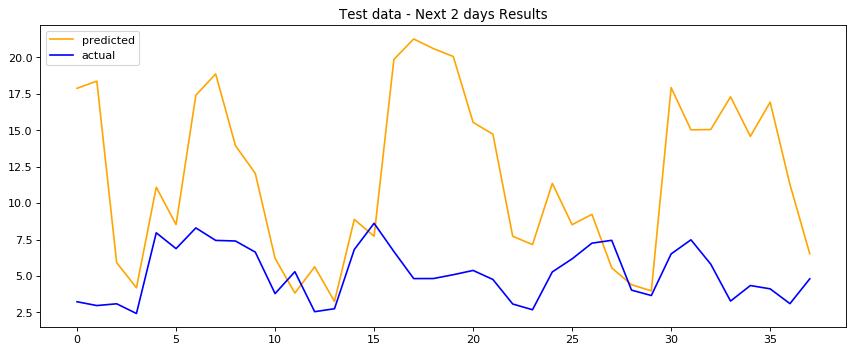



3.235
17.862078


2.9739999999999998
18.355536


3.095
5.917512


2.43
4.188961


7.96
11.082781


6.876
8.525223


8.295
17.390444


7.439
18.849182


7.398
13.931351


6.638
12.035738


3.7939999999999996
6.2099657


5.294
3.8284335


2.5540000000000003
5.6312056


2.7569999999999997
3.2522569


6.813
8.875394


8.612
7.727599


6.678
19.841488


4.822
21.245218


4.8260000000000005
20.580482


5.088
20.041147


5.381
15.526878


4.762
14.717611


3.0810000000000004
7.722753


2.687
7.152033


5.28
11.343325


6.175
8.514528


7.25
9.223773


7.445
5.5574303


4.031000000000001
4.4023533


3.662
3.981578


6.513
17.90887


7.48
15.016758


5.812
15.037117


3.282
17.28098


4.346
14.570418


4.12
16.91388


3.1039999999999996
11.26773


4.805
6.523675


38

In [30]:
plt.figure(figsize=(13,5),dpi=80)
plt.plot(final_preds_expand, color = 'orange', label = 'predicted')
plt.plot(test_y_expand, color = 'blue', label = 'actual')
plt.title("Test data - Next 2 days Results")
plt.legend(loc="upper left")
plt.show()
for x in range(len(test_y_expand)):
    print ("\n")
    print(test_y_expand[x])
    print(final_preds_expand[x])
len(test_y_expand)